## Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
from numpy.random import seed
seed(42)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

## Access and Format Data

In [4]:
#Read in CSV
default_df = pd.read_csv(os.path.join("Cleaned_Data", "default.csv"))
default_df.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,Latitude,Longitude,Country,Region,Sub_Region
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95,Brazil,South America,South America
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51,Cabo Verde,Africa,Western Africa
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00,Mali,Africa,Western Africa
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74,Ethiopia,Africa,Eastern Africa
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85,Morocco,Africa,Northern Africa


In [5]:
default_df["Sub_Region"].nunique()

15

In [6]:
default_df.drop(columns=['Latitude', 'Longitude', 'Country', 'Region' ])
default_df = default_df.drop(columns=['Latitude', 'Longitude', 'Country', 'Region'])

## One-Hot Encoding

In [7]:
# Step 0: Reformat data
data = default_df.values
X = data[:, 0:67]
y = data[:, 68]

In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
from tensorflow.keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: South America
Encoded Label: 9
------------
Original Class: Western Africa
Encoded Label: 13
------------
Original Class: Western Africa
Encoded Label: 13
------------
Original Class: Eastern Africa
Encoded Label: 4
------------
Original Class: Northern Africa
Encoded Label: 7
------------
Original Class: Western Africa
Encoded Label: 13
------------
Original Class: Western Africa
Encoded Label: 13
------------
Original Class: Western Africa
Encoded Label: 13
------------
Original Class: Northern Europe
Encoded Label: 8
------------
Original Class: Central Asia
Encoded Label: 3
------------
Original Class: Central Asia
Encoded Label: 3
------------
Original Class: Southern Europe
Encoded Label: 12
------------
Original Class: Southern Asia
Encoded Label: 11
------------
Original Class: Southern Asia
Encoded Label: 11
------------
Original Class: Northern Europe
Encoded Label: 8
------------
Original Class: Eastern Europe
Encoded Label: 6
------------
Original Class: Eas

------------
Original Class: Northern Africa
Encoded Label: 7
------------
Original Class: Eastern Africa
Encoded Label: 4
------------
Original Class: Eastern Africa
Encoded Label: 4
------------
Original Class: Eastern Africa
Encoded Label: 4
------------
Original Class: South-eastern Asia
Encoded Label: 10
------------
Original Class: South-eastern Asia
Encoded Label: 10
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: South-eastern Asia
Encoded Label: 10
------------
Original Class: South-eastern Asia
Encoded Label: 10
------------
Original Class: Caribbean
Encoded Label: 1
------------
Original Class: Caribbean
Encoded Label: 1
------------
Original Cla

Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: Eastern Asia
Encoded Label: 5
------------
Original Class: South-eastern Asia
Encoded Label: 10
------------
Original Class: South-eastern Asia
Encoded Label: 10
------------
Original Class: Caribbean
Encoded Label: 1
------------
Original Class: Caribbean
Encoded Label: 1
------------
Original Class: Northern Africa
Encoded Label: 7
------------
Original Class: Eastern Africa
Encoded Label: 4
------------
Original Class: Eastern Africa
Encoded Label: 4
------------
Original Class: Eastern Africa
Encoded Label: 4
------------
Original Class: Northern Africa
Encoded Label: 7
------------
Original Class: Southern Asia
Encoded Label: 11
------------
Original Class: Southern Asia
Encoded Label: 11
------------
Original Class: Southern Asia
En

## Training and Testing Sets

In [11]:
#Change strings values to float
default_df["Sub_Region"] = pd.to_numeric(default_df.Sub_Region, errors="coerce")
default_df.dtypes

0             float64
1             float64
2             float64
3             float64
4             float64
               ...   
64            float64
65            float64
66            float64
67            float64
Sub_Region    float64
Length: 69, dtype: object

In [12]:
#create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Shape the Data

In [13]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (794, 67)
y_train Shape: (794,)
X_test Shape: (265, 67)
y_test Shape: (265,)


In [14]:
# Create a StandardScater model and fit it to the training dat
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [15]:
#scale both training and testing models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.445
k: 3, Train/Test Score: 0.644/0.426
k: 5, Train/Test Score: 0.608/0.423
k: 7, Train/Test Score: 0.577/0.415
k: 9, Train/Test Score: 0.572/0.434
k: 11, Train/Test Score: 0.545/0.396
k: 13, Train/Test Score: 0.524/0.404
k: 15, Train/Test Score: 0.526/0.411


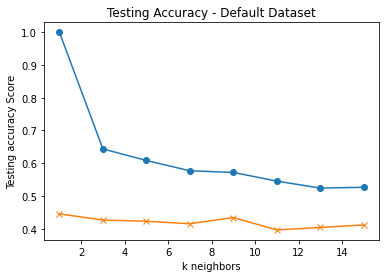

In [19]:
#K Nearest Neighbors
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 16, 2), train_scores, marker='o')
plt.plot(range(1, 16, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.title("Testing Accuracy - Default Dataset")
plt.savefig("static/images/default_knn.png", transparent=True)

In [22]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.434


In [ ]:
# default_df["Sub_Region"] = default_df["Sub_Region"].astype(str)
# default_df.dtypes

In [ ]:
# from yellowbrick.classifier import ConfusionMatrix
# cm = ConfusionMatrix(
#     model, classes="Sub_Region",
#     percent=True
#     label_encoder={0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}
# )
# cm.fit(X_train, y_train)
# cm.score(X_test, y_test)
# cm.show();

In [ ]:
# from yellowbrick.classifier import ClassificationReport
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()
# vizualizer = ClassificationReport(model, classes="encoded_y", support=True)
# vizualizer.fit(X_train, y_train)
# vizualizer.score(X_test, y_test)
# vizualizer.show()

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [ ]:
# # Create model and add layers
# model = Sequential()
# model.add(Dense(units=100, activation='relu', input_dim=20))
# model.add(Dense(units=100, activation='relu'))
# model.add(Dense(units=2, activation='softmax'))

In [ ]:
# # Compile and fit the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# model.fit(
#     X_train_scaled,
#     y_test,
#     epochs=20,
#     shuffle=True,
#     verbose=2
# )

In [ ]:
# model_loss, model_accuracy = model.evaluate(
#     X_test_scaled, y_test, verbose=2)
# print(
#     f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# encoded_predictions = model.predict_classes(X_test_scaled[:5])
# prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [ ]:
# print(f"Predicted classes: {prediction_labels}")
# print(f"Actual Labels: {list(y_test[:5])}")